In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Data/combined_zpallagi.csv")
df.head()

,id,year,State,new_agi_stub,Returns,Single,Joint,Hd_of_Hshld,AGI_Amt,Std_Ded_Charity_Returns,Std_Ded_Charity_Amt,Std_Ded_Returns,Std_Ded_Amt,Itemized_Ded_Returns,Itemized_Ded_Amt,Charitable_Returns,Charitable_Amt
0,0,2012,AL,1.0,889920.0,NaN,129070.0,256900.0,11517112.0,NaN,NaN,NaN,NaN,62120.0,850798.0,46490.0,121095.0
1,1,2012,AL,2.0,491150.0,NaN,159200.0,123350.0,17617800.0,NaN,NaN,NaN,NaN,129230.0,1914481.0,103450.0,358997.0
2,2,2012,AL,3.0,254280.0,NaN,148960.0,31480.0,15644666.0,NaN,NaN,NaN,NaN,112550.0,1914831.0,96530.0,404644.0
3,3,2012,AL,4.0,160160.0,NaN,126140.0,9030.0,13885434.0,NaN,NaN,NaN,NaN,91800.0,1770415.0,81870.0,406140.0
4,4,2012,AL,5.0,183320.0,NaN,161260.0,4890.0,24641055.0,NaN,NaN,NaN,NaN,141580.0,3383365.0,131170.0,849342.0


In [4]:
# the years where single filing return counts are not available

df[df.Single.isna()].reset_index().groupby('year').count()


,index,id,State,new_agi_stub,Returns,Single,Joint,Hd_of_Hshld,AGI_Amt,Std_Ded_Charity_Returns,Std_Ded_Charity_Amt,Std_Ded_Returns,Std_Ded_Amt,Itemized_Ded_Returns,Itemized_Ded_Amt,Charitable_Returns,Charitable_Amt
year,,,,,,,,,,,,,,,,,
2012,306,306,306,306,306,0,306,306,306,0,0,0,0,306,306,306,306
2013,306,306,306,306,306,0,306,306,306,0,0,0,0,306,306,306,306


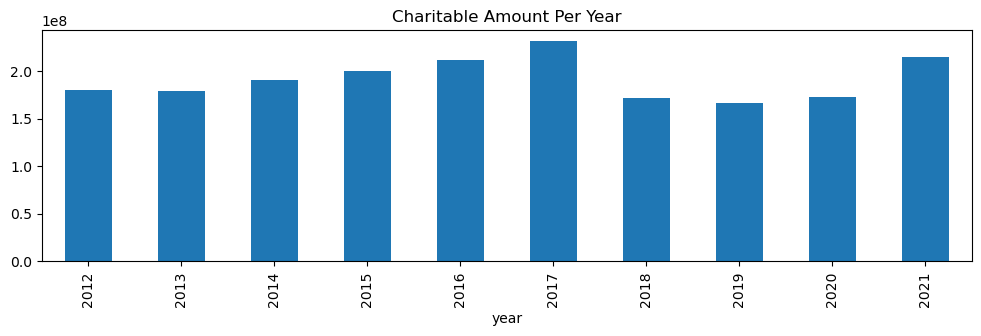

In [5]:
df.groupby('year').Charitable_Amt.sum().plot.bar(title='Charitable Amount Per Year', figsize=[12,3]);

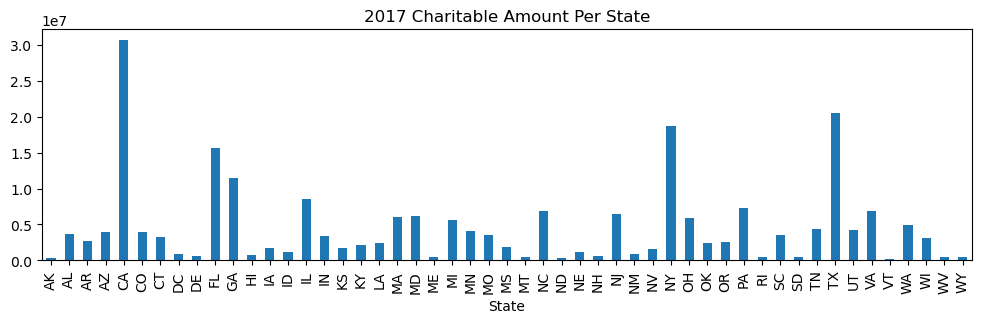

In [6]:
df[df.year==2017].groupby(['State']).Charitable_Amt.sum().plot.bar(figsize=[12,3],title='2017 Charitable Amount Per State');

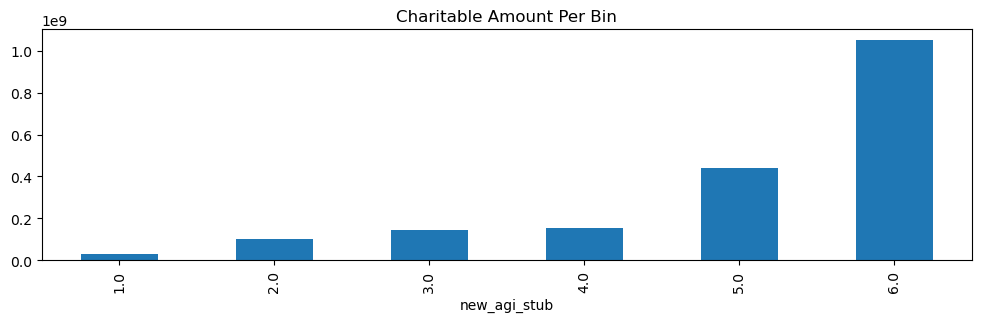

In [7]:
df.groupby('new_agi_stub').Charitable_Amt.sum().plot.bar(title='Charitable Amount Per Bin', figsize=[12,3]);

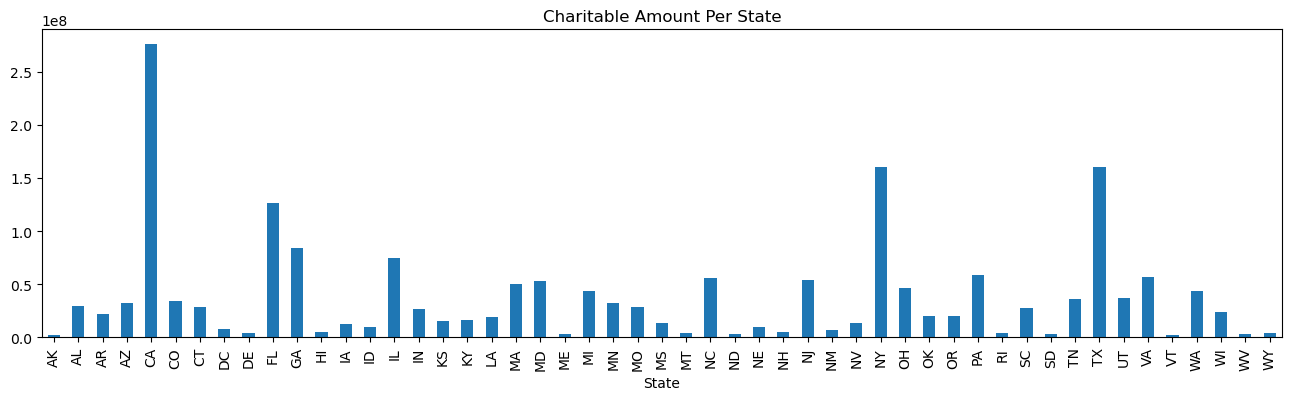

In [8]:
df.groupby('State').Charitable_Amt.sum().plot.bar(title='Charitable Amount Per State', figsize=[16,4]);

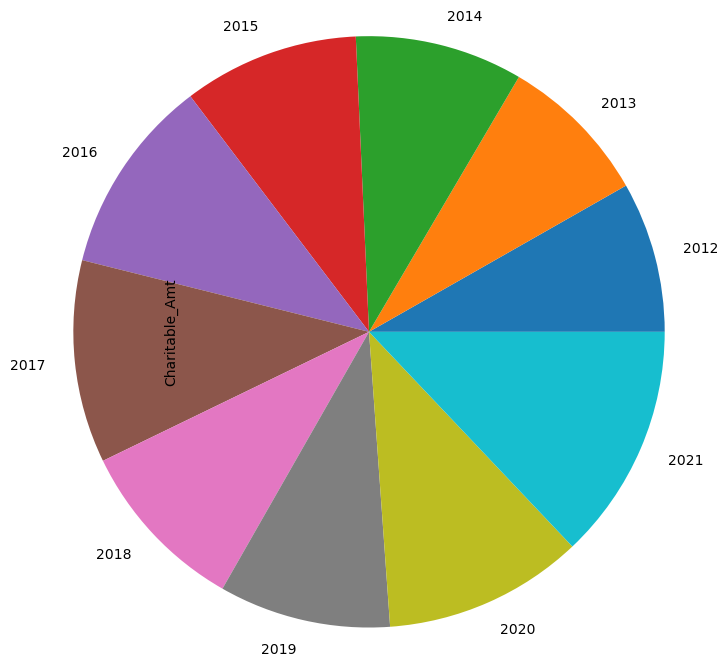

In [9]:
df[df.State=='CA'].groupby('year').Charitable_Amt.sum().plot.pie(radius=2);

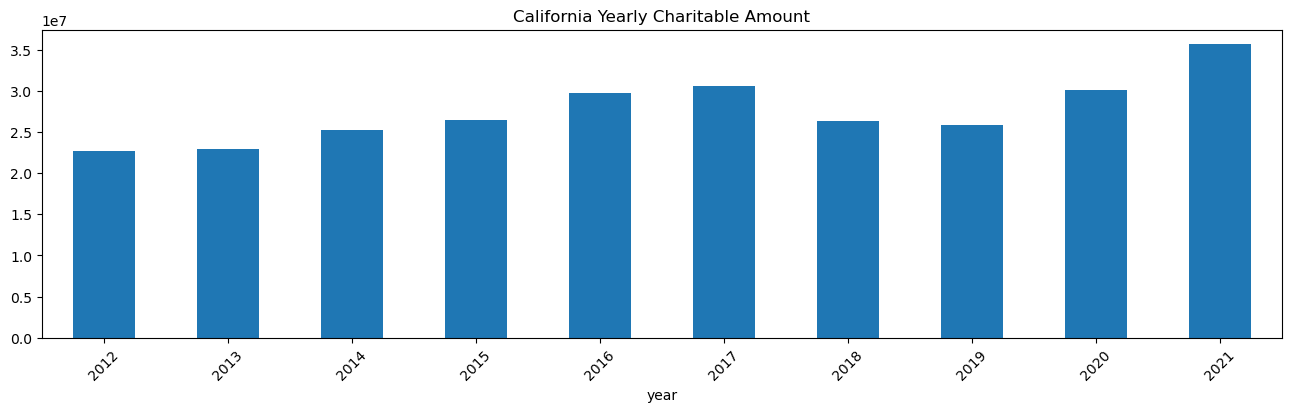

In [10]:
df[df.State=='CA'].groupby('year').Charitable_Amt.sum().\
    plot.bar(figsize=[16,4],rot=45,title='California Yearly Charitable Amount');

In [11]:
ca = df[df.State=='CA'][['new_agi_stub', 'AGI_Amt', 'Charitable_Amt']]
ca[:5]

,new_agi_stub,AGI_Amt,Charitable_Amt
24,1.0,81950048.0,444698.0
25,2.0,138870904.0,1377136.0
26,3.0,131910234.0,2010608.0
27,4.0,117875012.0,2131998.0
28,5.0,274055549.0,5388583.0


In [12]:
ca[ca.new_agi_stub==1.0]['Charitable_Amt']

24      444698.0
330     430089.0
636     391801.0
942     410072.0
1248    418660.0
1554    407875.0
1860    164624.0
2166    153512.0
2472    149335.0
2778    126097.0
Name: Charitable_Amt, dtype: float64

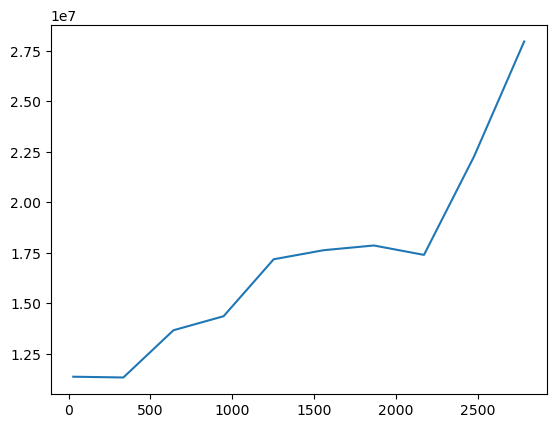

In [13]:
plt.plot(ca[ca.new_agi_stub==6.0]['Charitable_Amt'])

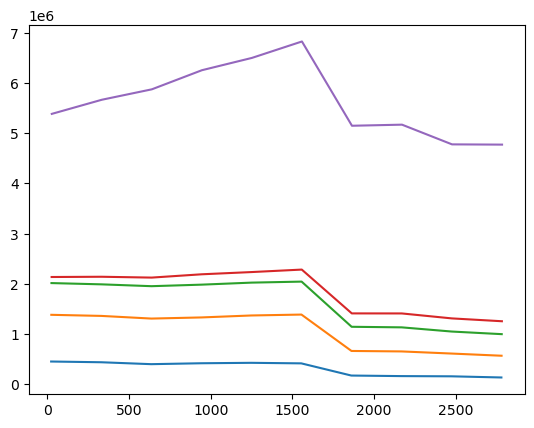

In [14]:
plt.plot(ca[ca.new_agi_stub==1.0]['Charitable_Amt'])
plt.plot(ca[ca.new_agi_stub==2.0]['Charitable_Amt'])
plt.plot(ca[ca.new_agi_stub==3.0]['Charitable_Amt'])
plt.plot(ca[ca.new_agi_stub==4.0]['Charitable_Amt'])
plt.plot(ca[ca.new_agi_stub==5.0]['Charitable_Amt'])

<Axes: >

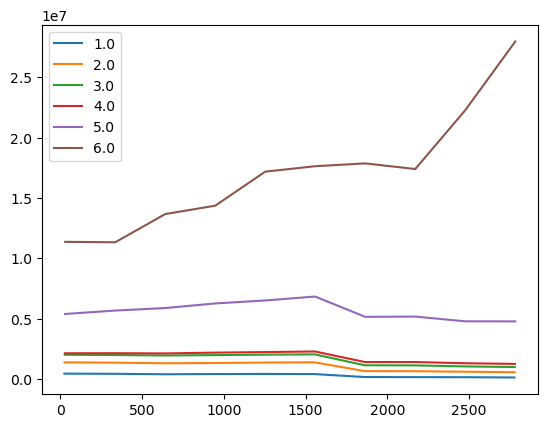

In [15]:
df[(df.State=='CA')&(df['new_agi_stub']==1.0)]['Charitable_Amt'].plot(label='1.0',legend=True)
df[(df.State=='CA')&(df['new_agi_stub']==2.0)]['Charitable_Amt'].plot(label='2.0',legend=True)
df[(df.State=='CA')&(df['new_agi_stub']==3.0)]['Charitable_Amt'].plot(label='3.0',legend=True)
df[(df.State=='CA')&(df['new_agi_stub']==4.0)]['Charitable_Amt'].plot(label='4.0',legend=True)
df[(df.State=='CA')&(df['new_agi_stub']==5.0)]['Charitable_Amt'].plot(label='5.0',legend=True)
df[(df.State=='CA')&(df['new_agi_stub']==6.0)]['Charitable_Amt'].plot(label='6.0',legend=True)


In [16]:
df[df.State=='CA'][['State', 'new_agi_stub', 'Charitable_Amt']]

,State,new_agi_stub,Charitable_Amt
24,CA,1.0,444698.0
25,CA,2.0,1377136.0
26,CA,3.0,2010608.0
27,CA,4.0,2131998.0
28,CA,5.0,5388583.0
29,CA,6.0,11367131.0
330,CA,1.0,430089.0
331,CA,2.0,1355325.0
332,CA,3.0,1985318.0
333,CA,4.0,2136964.0


In [17]:
charitableAmt_agiAmt = df.groupby(['new_agi_stub', 'State', 'year']).agg({
#     'Charitable_Amt': 'mean', 'AGI_Amt': 'mean'}).reset_index()

SyntaxError: incomplete input (1615875456.py, line 2)

In [ ]:
# without year
charitableAmt_agiAmt = df.groupby(['new_agi_stub', 'State',]).agg({
    'Charitable_Amt': 'mean', 'AGI_Amt': 'mean'}).reset_index()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=charitableAmt_agiAmt, x='AGI_Amt', y='Charitable_Amt', hue='new_agi_stub', size='new_agi_stub', sizes=(50, 200))
plt.title('Analysis of Charitable Amount vs AGI Amount per Income Bracket (1=Low, 6=High)')
plt.xlabel('AGI Amount')
plt.ylabel('Charitable Amount')
plt.legend(title='AGI Stub')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=charitableAmt_agiAmt, x='AGI_Amt', y='Charitable_Amt', hue='new_agi_stub', size='new_agi_stub', sizes=(50, 200))

In [ ]:
# plt.title('Analysis of Charitable Amount vs AGI Amount per AGI Stub')
# plt.xlabel('AGI Amount ($)')
# plt.ylabel('Charitable Amount ($)')
# plt.legend(title='AGI Stub')

# fmt = '${x:,.0f}'
# tick = mtick.StrMethodFormatter(fmt)
# plt.gca().xaxis.set_major_formatter(tick)
# plt.gca().yaxis.set_major_formatter(tick)

# plt.show()

In [ ]:
# Create the scatter plot
plt.figure(figsize=(12, 8))

# Initialize a list to store the handles and labels for the legend
handles, labels = [], []

for new_agi_stub, data in charitableAmt_agiAmt.groupby('new_agi_stub'):
    handle = sns.scatterplot(data=charitableAmt_agiAmt, x='AGI_Amt', y='Charitable_Amt', label=f'Income Bracket {new_agi_stub}', 
        size='new_agi_stub', sizes=(50, 200))
    handles.append(handle)
    labels.append(f'Income Bracket {new_agi_stub}')

# Customize the plot
plt.title('Analysis of Charitable Amount vs AGI Amount per AGI Stub')
plt.xlabel('AGI Amount ($)')
plt.ylabel('Charitable Amount ($)')

# Add custom legend
plt.legend(handles, labels, title='Income Brackets')

# Format the tick labels in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().xaxis.set_major_formatter(tick)
plt.gca().yaxis.set_major_formatter(tick)

plt.show()

In [ ]:
# comp_df = pd.concat(complete_data)
# print(comp_df.shape)
# comp_df.head()

In [ ]:
# for col in comp_df.columns:
#     print(col)

In [ ]:
# df1[['Std_Ded_Charity_Returns', 'Std_Ded_Charity_Amt',
#       'Charitable_Returns', 'Charitable_Amt']].plot.bar()

In [ ]:
# df1[['Std_Ded_Charity_Amt','Charitable_Amt']].plot.bar()

In [ ]:
# df_count = df1[['State', 'AGI_Range2', 'Returns', 'Single', 'Joint', 'Hd_of_Hshld',
#        'Cap_Gain_Returns', 'Std_Ded_Charity_Returns', 
#        'Itemized_Ded_Returns', 'Total_Taxes_Returns',
#        'Charitable_Returns']]

# df_count.head()

In [ ]:

# df_amt=df1[['State', 'AGI_Range2', 'AGI_Amt', 'Total_Income', 'Cap_Gain_Amt',
#        'Std_Ded_Charity_Amt', 'Itemized_Ded_Amt', 'Total_Taxes_Amt', 'Charitable_Amt']]
# df_amt.head()


In [ ]:
# df1['$$ avg_charitable_amt'] = (df_amt['Charitable_Amt']/df_count['Charitable_Returns']) 

# df1.head()